## Create study area plot

/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_bou

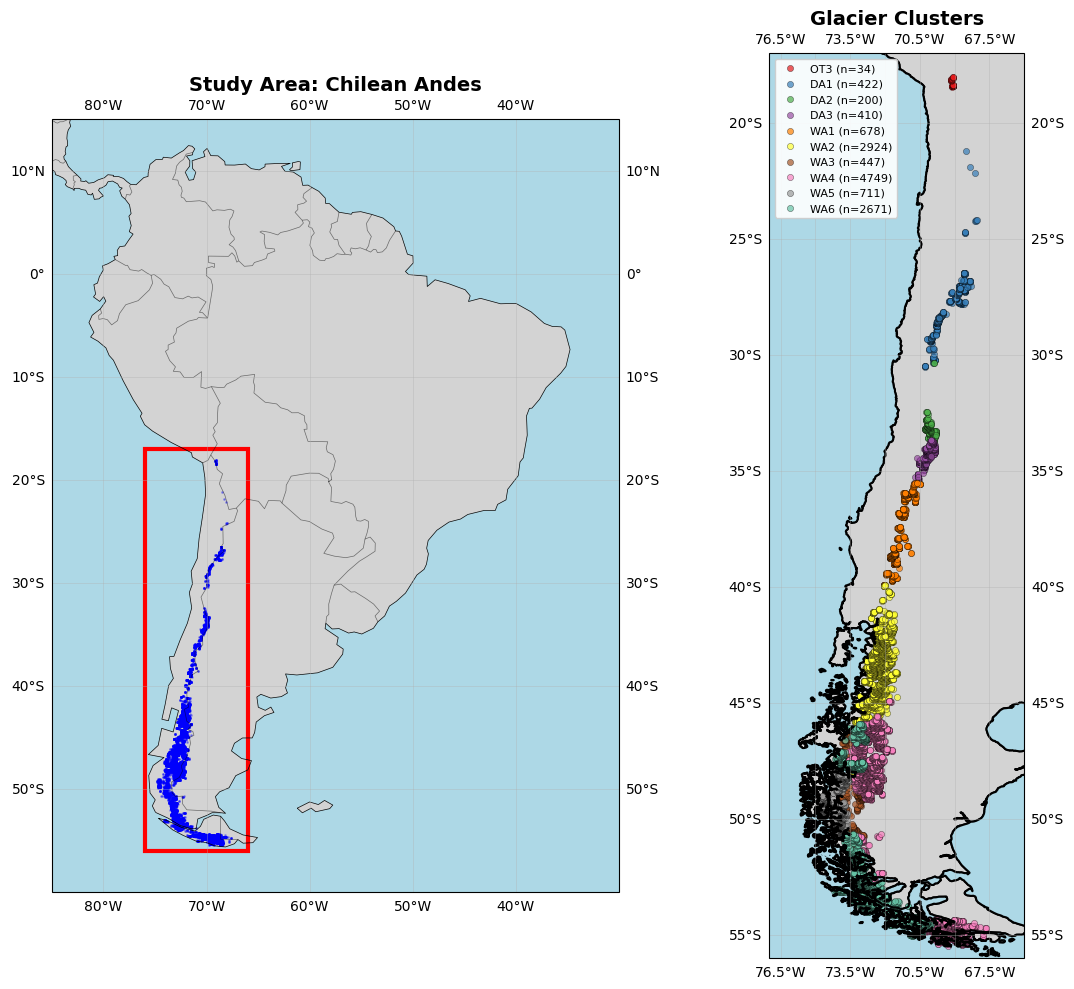

✓ Map saved to: Study_Area_Map.png


In [1]:
"""
Create study area map showing glacier clusters in Chile
"""

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your cluster data
datos_rgi = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/RGI_BNA_Clusters.csv')

# Create GeoDataFrame from your RGI data (assuming it has lat/lon columns)
# If your CSV has CenLat and CenLon:
gdf = gpd.GeoDataFrame(
    datos_rgi,
    geometry=gpd.points_from_xy(datos_rgi.CenLon, datos_rgi.CenLat),
    crs='EPSG:4326'
)

# Define cluster colors
cluster_colors = {
    'OT3': '#e41a1c',
    'DA1': '#377eb8',
    'DA2': '#4daf4a',
    'DA3': '#984ea3',
    'WA1': '#ff7f00',
    'WA2': '#ffff33',
    'WA3': '#a65628',
    'WA4': '#f781bf',
    'WA5': '#999999',
    'WA6': '#66c2a5'
}

# Create figure with two panels
fig = plt.figure(figsize=(12, 10))

# PANEL 1: South America context map
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-85, -30, -60, 15], crs=ccrs.PlateCarree())

# Add features
ax1.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='none')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)

# Highlight Chile
chile_bounds = [-76, -66, -56, -17]  # lon_min, lon_max, lat_min, lat_max
ax1.add_patch(Rectangle(
    xy=(chile_bounds[0], chile_bounds[2]),
    width=chile_bounds[1] - chile_bounds[0],
    height=chile_bounds[3] - chile_bounds[2],
    facecolor='none',
    edgecolor='red',
    linewidth=3,
    transform=ccrs.PlateCarree()
))

# Add all glaciers as small dots
ax1.scatter(gdf.CenLon, gdf.CenLat, s=1, c='blue', alpha=0.3, 
           transform=ccrs.PlateCarree(), label='Glaciers')

ax1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax1.set_title('Study Area: Chilean Andes', fontsize=14, fontweight='bold')

# PANEL 2: Chile detail with clusters
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-77, -66, -56, -17], crs=ccrs.PlateCarree())

# Add features
ax2.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black', linewidth=1.5)
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax2.add_feature(cfeature.COASTLINE, linewidth=1.5, edgecolor='black')

# Plot each cluster with different colors
for cluster_name, color in cluster_colors.items():
    cluster_data = gdf[gdf['Cluster'] == cluster_name]
    if len(cluster_data) > 0:
        ax2.scatter(cluster_data.CenLon, cluster_data.CenLat, 
                   s=20, c=color, alpha=0.7, 
                   transform=ccrs.PlateCarree(),
                   label=f'{cluster_name} (n={len(cluster_data)})',
                   edgecolors='black', linewidths=0.3)

ax2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
ax2.set_title('Glacier Clusters', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=8, framealpha=0.9)

plt.tight_layout()
plt.savefig('/Users/milliespencer/Desktop/CR2_OGGM_Paper/Study_Area_Map.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Map saved to: Study_Area_Map.png")